# Definition of a stochastic process

Using probability theory, a stochastic process $X$ is a family 

\begin{equation}
\{X_t \; : \; t \in T\},
\end{equation}

of random variables $X_t$ indexed by some set $T$. All the random variables take values in a common state space, $S$. The state space can be discrete or continuous. Although we might use discrete state spaces in some of the examples, one should realize that most examples in physics belong to the continuous type.

Furthermore, the family is known as **discrete process** if the indices take discrete values $t \in \{0,1,2,\ldots\}$. This will in fact be the situation in the practical application of **Markov chain Monte Carlo** applications that we are aiming for. On the other hand, many physical stochastic processes are **continuous** and will have $T \in \mathbb{R}$ or $t \in [0,\infty)$. In either case we think of a stochastic process as a family of variables that evolve as time passes, although in general $T$ might be any kind of ordering index and is not restricted to physical time.

Due to the randomness, different runs of the stochastic process will generate different sequences of outputs. An observer recording many such sequences generated from the same stochastic process would need to measure all the following conditional probabilities to fully describe the process:

\begin{equation}
\begin{gathered}
p_{X_0}(x_0), \\
p_{X_1 \vert X_0}(x_1 | x_0), \\
p_{X_2 \vert X_0, X_1}(x_2 | x_0, x_1), \\
\vdots\\
p_{X_n \vert X_0, X_1, \ldots, X_{n-1}} \left( x_n | x_0, x_1, \ldots, x_{n-1} \right).
\end{gathered}
\end{equation}

```{prf:example} Conditional probabilities of a stochastic process
:label: example:conditional-stochastic-process

Below is an example of a stochastic process (implemented using an abstract python class [`StochasticProcess`](https://gitlab.com/cforssen/tif385-book/-/blob/tif385/content/Utils/StochasticProcess/StochasticProcess.py)).

Note that the process indeed is defined by: 
1. the distribution of the first random variable $X_0$, which is included in the definition of class method `start`, and 
2. the conditional distributions for subsequent variables (as defined in the class method `update`). 

Two relevant visualizations are also included in the example below
* Plots of the first variables from a few runs.
* A corner plot of bivariate and univariate marginal distributions.
```

In [1]:
import numpy as np
import sys
import os
# Adding ./CodeLocal/ to the python module search path
# sys.path.insert(0, os.path.abspath('../../Utils/'))
sys.path.append('../CodeLocal')

from StochasticProcess.StochasticProcess import StochasticProcess as SP

class StochasticProcessExample(SP):
    def start(self,random_state):
        return random_state.uniform()

    def update(self, random_state, history):
        return np.sum(history) + random_state.uniform()

In [2]:
# Create an instance of the class. It is possible to provide a seed
# for the random state such that results are reproducible.
example = StochasticProcessExample(seed=1)

# The following method call produces 4 runs, each of length 10.
example.create_multiple_processes(10,4)

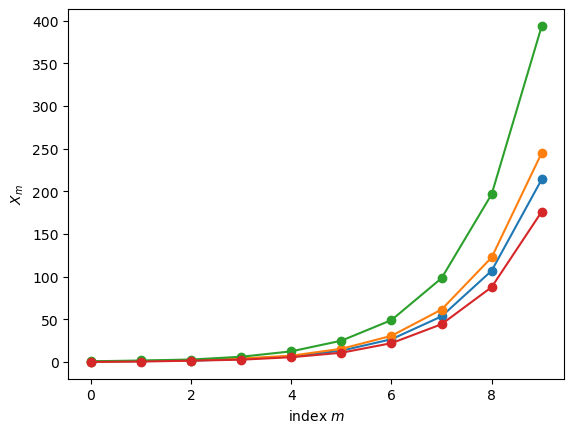

In [3]:
# and here plotted
fig_runs, ax_runs = example.plot_processes()

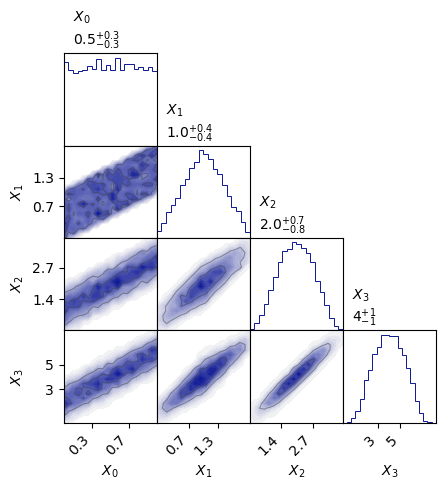

In [4]:
# Pretty corner plots generated with `prettyplease`
# https://github.com/svisak/prettyplease 
import prettyplease.prettyplease as pp

# Here we instead create 10,000 runs (to collect statistics), each of length 4.
example.create_multiple_processes(4,10000)
fig_corner = pp.corner(example.sequence.T,labels=[fr'$X_{{{i}}}$' for i in range(13)])

```{exercise}
:label: exercise:StochasticProcess:first-example

Can you understand the initialization and update rules of {prf:ref}`example:conditional-stochastic-process`?
```

```{exercise}
:label: exercise:conditional-probabilities-stochastic-process

For each panel of the pairplot above:

* What conditional distribution of random variables does each panel show?
* What random variables are marginalized out, if any?
* Explain how the pairplot answers the question "Are $X_3$ and $X_0$ independent?"?

Hints: 
* The top-left panel shows $\p{X_0}$, with no marginalization since $X_0$ starts the random sequence. 
* The independence of $X_3$ and $X_0$ would imply $\pdf{X_3}{X_0}=\p{X_3}$.
```

```{exercise}
:label: exercise:construct-stochastic-process

Define your own stochastic process by creating your own initial and update methods within the StochasticProcess class. Explore the conditional probabilities by creating many chains and making plots. 
```